# 😷 Face Mask Detection - Interactive Educational Notebook

## Learn by Doing - No Streamlit Required!

This notebook recreates the face mask detection app as a pure Python notebook for learning purposes.
**Just run the cells and see the results!**

---

### 📚 What You'll Learn

1. **Load and visualize images** with matplotlib
2. **Detect faces** using Haar Cascade classifiers
3. **Classify mask presence** with CNN model
4. **Visualize results** step-by-step
5. **Understand the complete pipeline** interactively

---

### 🎯 How to Use This Notebook

1. Run each cell in order (Shift + Enter)
2. Upload your own images or use examples
3. See visual results at each step
4. Experiment with different images
5. Learn how everything works!

Let's get started! 🚀

## 📦 Step 1: Install and Import Libraries

In [94]:
# Import libraries for notebook visualization
import tensorflow as tf
from tensorflow.keras.models import load_model
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from IPython.display import display, HTML
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Set matplotlib to display images inline
%matplotlib inline

print("✅ Libraries imported successfully!")
print(f"TensorFlow Version: {tf.__version__}")
print(f"OpenCV Version: {cv2.__version__}")

✅ Libraries imported successfully!
TensorFlow Version: 2.20.0
OpenCV Version: 4.12.0


## 🤖 Step 2: Load Pre-trained Face Mask Detection Model

In [ ]:
# Load the trained face mask detection model
print("🔄 Loading face mask detection model...")

model_path = #put your model path

try:
    model = load_model(model_path)
    print("✅ Model loaded successfully!")
    print(f"\n📊 Model Summary:")
    print(f"   Input Shape: {model.input_shape}")
    print(f"   Output Classes: {model.output_shape[-1]} (Mask / No Mask)")
    print(f"   Total Parameters: {model.count_params():,}")
except Exception as e:
    print(f"❌ Error loading model: {e}")
    print("   Please check the model path!")

🔄 Loading face mask detection model...
✅ Model loaded successfully!

📊 Model Summary:
   Input Shape: (None, 128, 128, 3)
   Output Classes: 2 (Mask / No Mask)
   Total Parameters: 3,312,546


## 👤 Step 3: Load Face Detection (Haar Cascade)

In [96]:
# Load Haar Cascade for face detection
print("🔄 Loading Haar Cascade face detector...")

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

if face_cascade.empty():
    print("❌ Failed to load face cascade!")
else:
    print("✅ Face detector loaded successfully!")
    print("   This will detect faces in images before checking for masks")

🔄 Loading Haar Cascade face detector...
✅ Face detector loaded successfully!
   This will detect faces in images before checking for masks


## 🔧 Step 4: Define Detection Functions (Educational Version with Visualization)

In [97]:
def detect_and_classify_educational(image_bgr, face_cascade, model, show_process=True):
    """
    Detect faces and classify mask presence with educational visualizations.
    EXACTLY matching Streamlit app behavior.
    
    Args:
        image_bgr: BGR image array (OpenCV format)
        face_cascade: Haar Cascade classifier
        model: Trained mask detection model
        show_process: If True, displays intermediate steps
    
    Returns:
        Annotated image (RGB), detection statistics, face details
    """
    print("="*70)
    print("🔍 FACE MASK DETECTION PIPELINE")
    print("="*70)
    
    # Step 1: Detect faces on BGR image (same as Streamlit app)
    print("\n📍 Step 1: Detecting faces using Haar Cascade on BGR image...")
    faces = face_cascade.detectMultiScale(image_bgr, scaleFactor=1.1)
    print(f"   ✅ Found {len(faces)} face(s)")
    
    # Convert to RGB for drawing (same as Streamlit: original_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    result_image = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
    
    if len(faces) == 0:
        print("   ⚠️  No faces detected in the image!")
        return result_image, {}, []
    
    # Prepare for results
    face_details = []
    mask_count = 0
    no_mask_count = 0
    
    # Process each face
    for idx, (x, y, w, h) in enumerate(faces, 1):
        print(f"\n{'─'*70}")
        print(f"👤 Processing Face #{idx}")
        print(f"{'─'*70}")
        print(f"   📐 Bounding Box: x={x}, y={y}, width={w}, height={h}")
        
        # Step 2: Extract face from BGR image (matching Streamlit)
        face_region_bgr = image_bgr[y:y+h, x:x+w]
        print(f"   📏 Cropped Face Size: {face_region_bgr.shape}")
        
        # Show cropped face if visualization is enabled
        if show_process:
            # Convert BGR to RGB for display
            face_display = cv2.cvtColor(face_region_bgr, cv2.COLOR_BGR2RGB)
            plt.figure(figsize=(4, 4))
            plt.imshow(face_display)
            plt.title(f'Face #{idx} - Cropped Region', fontweight='bold')
            plt.axis('off')
            plt.show()
        
        # Preprocess for model - EXACTLY like Streamlit app
        # face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
        face_rgb = cv2.cvtColor(face_region_bgr, cv2.COLOR_BGR2RGB)
        face_resized = cv2.resize(face_rgb, (128, 128))
        face_normalized = np.array(face_resized) / 255.0
        face_batch = np.expand_dims(face_normalized, axis=0)
        
        print(f"   🔄 Preprocessing: Resized to 128x128, Normalized")
        
        # Step 3: Predict mask presence
        print(f"   🤖 Running CNN Model Prediction...")
        predictions = model.predict(face_batch, verbose=0)
        
        mask_prob = predictions[0][0]
        withoutMask_prob = predictions[0][1]
        
        # Determine label - EXACTLY matching Streamlit app logic
        # 'No Mask' if mask > withoutMask else 'Mask'
        label = 'No Mask' if mask_prob > withoutMask_prob else 'Mask'
        confidence = max(mask_prob, withoutMask_prob) * 100
        
        if label == 'Mask':
            mask_count += 1
            color = (0, 255, 0)  # Green
            bg_color = (40, 200, 40)
        else:
            no_mask_count += 1
            color = (255, 0, 0)  # Red
            bg_color = (220, 40, 40)
        
        print(f"   🎯 Prediction: {label}")
        print(f"   📊 Confidence: {confidence:.2f}%")
        print(f"   📈 Raw Probabilities: mask={mask_prob:.4f}, withoutMask={withoutMask_prob:.4f}")
        
        # Store face details
        face_details.append({
            'Face': f'Face {idx}',
            'Label': label,
            'Confidence (%)': round(confidence, 2),
            'Bounding Box': f'({x}, {y}, {w}, {h})'
        })
        
        # Draw enhanced annotations
        thickness = 3
        cv2.rectangle(result_image, (x, y), (x + w, y + h), color, thickness)
        
        # Draw corner accents
        corner_length = min(20, w // 5, h // 5)
        cv2.line(result_image, (x, y), (x + corner_length, y), color, thickness + 2)
        cv2.line(result_image, (x, y), (x, y + corner_length), color, thickness + 2)
        cv2.line(result_image, (x + w, y), (x + w - corner_length, y), color, thickness + 2)
        cv2.line(result_image, (x + w, y), (x + w, y + corner_length), color, thickness + 2)
        cv2.line(result_image, (x, y + h), (x + corner_length, y + h), color, thickness + 2)
        cv2.line(result_image, (x, y + h), (x, y + h - corner_length), color, thickness + 2)
        cv2.line(result_image, (x + w, y + h), (x + w - corner_length, y + h), color, thickness + 2)
        cv2.line(result_image, (x + w, y + h), (x + w, y + h - corner_length), color, thickness + 2)
        
        # Add label with background
        text = f"{label} ({confidence:.1f}%)"
        font = cv2.FONT_HERSHEY_DUPLEX
        font_scale = 0.7
        font_thickness = 2
        
        (text_width, text_height), baseline = cv2.getTextSize(text, font, font_scale, font_thickness)
        label_y_pos = y - 15 if y - 15 > text_height + 10 else y + h + text_height + 15
        
        # Shadow
        shadow_offset = 3
        cv2.rectangle(result_image, (x - 2 + shadow_offset, label_y_pos - text_height - 8 + shadow_offset),
                     (x + text_width + 12 + shadow_offset, label_y_pos + 8 + shadow_offset), (0, 0, 0), -1)
        
        # Background
        cv2.rectangle(result_image, (x - 2, label_y_pos - text_height - 8),
                     (x + text_width + 12, label_y_pos + 8), bg_color, -1)
        
        # Border
        cv2.rectangle(result_image, (x - 2, label_y_pos - text_height - 8),
                     (x + text_width + 12, label_y_pos + 8), color, 2)
        
        # Text shadow
        cv2.putText(result_image, text, (x + 5 + 2, label_y_pos + 2), font, font_scale, (0, 0, 0), font_thickness + 1)
        
        # Main text
        cv2.putText(result_image, text, (x + 5, label_y_pos), font, font_scale, (255, 255, 255), font_thickness)
    
    # Calculate statistics
    stats = {
        'total_faces': len(faces),
        'mask_count': mask_count,
        'no_mask_count': no_mask_count,
        'compliance_rate': (mask_count / len(faces) * 100) if len(faces) > 0 else 0
    }
    
    return result_image, stats, face_details


print("✅ Detection function defined!")

✅ Detection function defined!


## 📸 Step 5: Load and Display Your Image

Replace the path below with your own image, or use one of the example images provided!

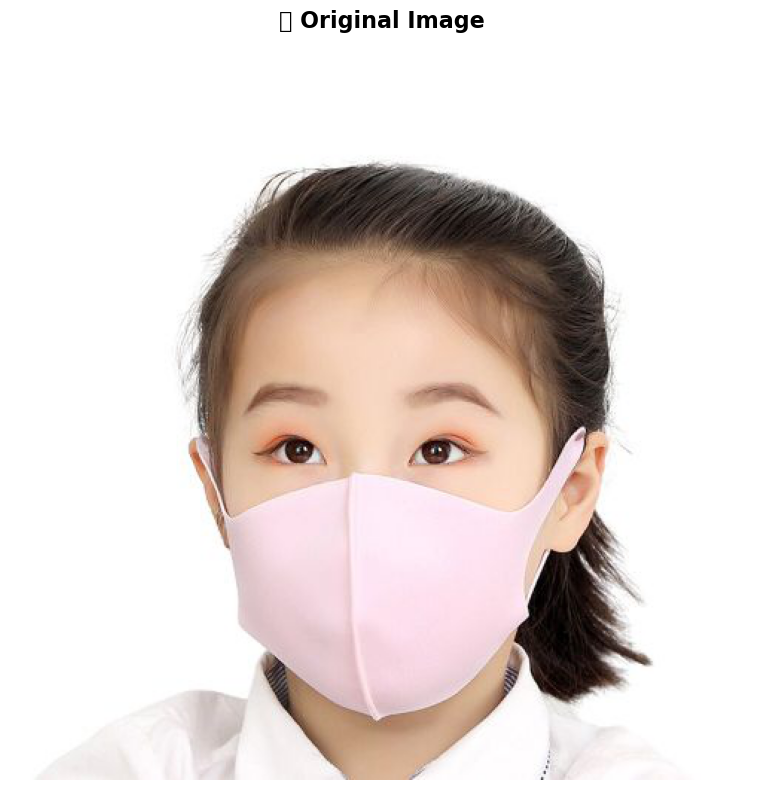

✅ Image loaded successfully!
   Image Shape: (500, 500, 3)
   Image Size: 500x500 pixels
   Format: RGB → BGR converted for processing


In [ ]:
# Specify image path directly
# Try one of the example images in Image_examples folder!

image_path = #Put your image path 

try:
    img = Image.open(image_path)
    image_array = np.array(img)
    
    # Convert RGB to BGR for OpenCV compatibility (important!)
    if len(image_array.shape) == 3 and image_array.shape[2] == 3:
        image_bgr = cv2.cvtColor(image_array, cv2.COLOR_RGB2BGR)
    else:
        image_bgr = image_array
    
    # Display the uploaded image (use RGB for matplotlib)
    plt.figure(figsize=(12, 8))
    plt.imshow(image_array)
    plt.title('📸 Original Image', fontsize=16, fontweight='bold')
    plt.axis('off')
    plt.tight_layout()
    plt.show()
    
    print(f"✅ Image loaded successfully!")
    print(f"   Image Shape: {image_array.shape}")
    print(f"   Image Size: {image_array.shape[1]}x{image_array.shape[0]} pixels")
    print(f"   Format: RGB → BGR converted for processing")
except Exception as e:
    print(f"❌ Error loading image: {e}")
    print("   Please check the image path!")

## 🔍 Step 6: Run Face Mask Detection with Detailed Visualization

🔍 FACE MASK DETECTION PIPELINE

📍 Step 1: Detecting faces using Haar Cascade on BGR image...
   ✅ Found 1 face(s)

──────────────────────────────────────────────────────────────────────
👤 Processing Face #1
──────────────────────────────────────────────────────────────────────
   📐 Bounding Box: x=103, y=165, width=286, height=286
   📏 Cropped Face Size: (286, 286, 3)


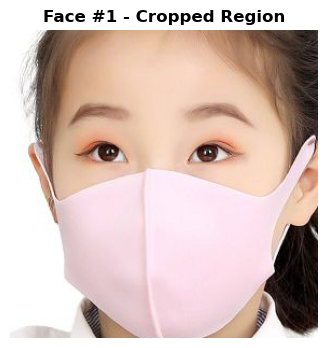

   🔄 Preprocessing: Resized to 128x128, Normalized
   🤖 Running CNN Model Prediction...
   🎯 Prediction: Mask
   📊 Confidence: 99.96%
   📈 Raw Probabilities: mask=0.0001, withoutMask=0.9996

✅ DETECTION COMPLETE!
   🎯 Prediction: Mask
   📊 Confidence: 99.96%
   📈 Raw Probabilities: mask=0.0001, withoutMask=0.9996

✅ DETECTION COMPLETE!


In [100]:
# Run detection with full visualization
if 'image_bgr' in locals() and 'model' in locals() and 'face_cascade' in locals():
    # Use BGR image for detection (same as Streamlit app)
    annotated_image, stats, face_details = detect_and_classify_educational(
        image_bgr, 
        face_cascade, 
        model, 
        show_process=True
    )
    
    print("\n" + "="*70)
    print("✅ DETECTION COMPLETE!")
    print("="*70)
else:
    print("❌ Please load the image, model, and face cascade first!")

## 📊 Step 7: View Detection Results & Statistics

In [53]:
# Display detection results table
if 'face_details' in locals() and len(face_details) > 0:
    print("📋 DETECTION RESULTS TABLE")
    print("="*70)
    
    df = pd.DataFrame(face_details)
    display(df)
    
    print("\n📊 SUMMARY STATISTICS")
    print("="*70)
    print(f"   Total Faces Detected: {stats['total_faces']}")
    print(f"   😷 With Mask: {stats['mask_count']}")
    print(f"   ❌ Without Mask: {stats['no_mask_count']}")
    print(f"   📈 Compliance Rate: {stats['compliance_rate']:.1f}%")
    print("="*70)
    
    # Compliance status
    if stats['compliance_rate'] == 100:
        print("\n✅ 100% MASK COMPLIANCE - All people are wearing masks!")
    elif stats['compliance_rate'] >= 50:
        print(f"\n⚠️  {stats['compliance_rate']:.1f}% MASK COMPLIANCE - Some people not wearing masks")
    else:
        print(f"\n❌ {stats['compliance_rate']:.1f}% MASK COMPLIANCE - Most people not wearing masks")
else:
    print("No detection results available.")

📋 DETECTION RESULTS TABLE


,Face,Label,Confidence (%),Bounding Box
0,Face 1,Mask,53.959999,"(58, 338, 51, 51)"
1,Face 2,Mask,89.510002,"(464, 85, 164, 164)"
2,Face 3,Mask,80.879997,"(101, 85, 164, 164)"
3,Face 4,Mask,81.919998,"(269, 81, 178, 178)"



📊 SUMMARY STATISTICS
   Total Faces Detected: 4
   😷 With Mask: 4
   ❌ Without Mask: 0
   📈 Compliance Rate: 100.0%

✅ 100% MASK COMPLIANCE - All people are wearing masks!


## 🎨 Step 8: Visualize Final Annotated Image

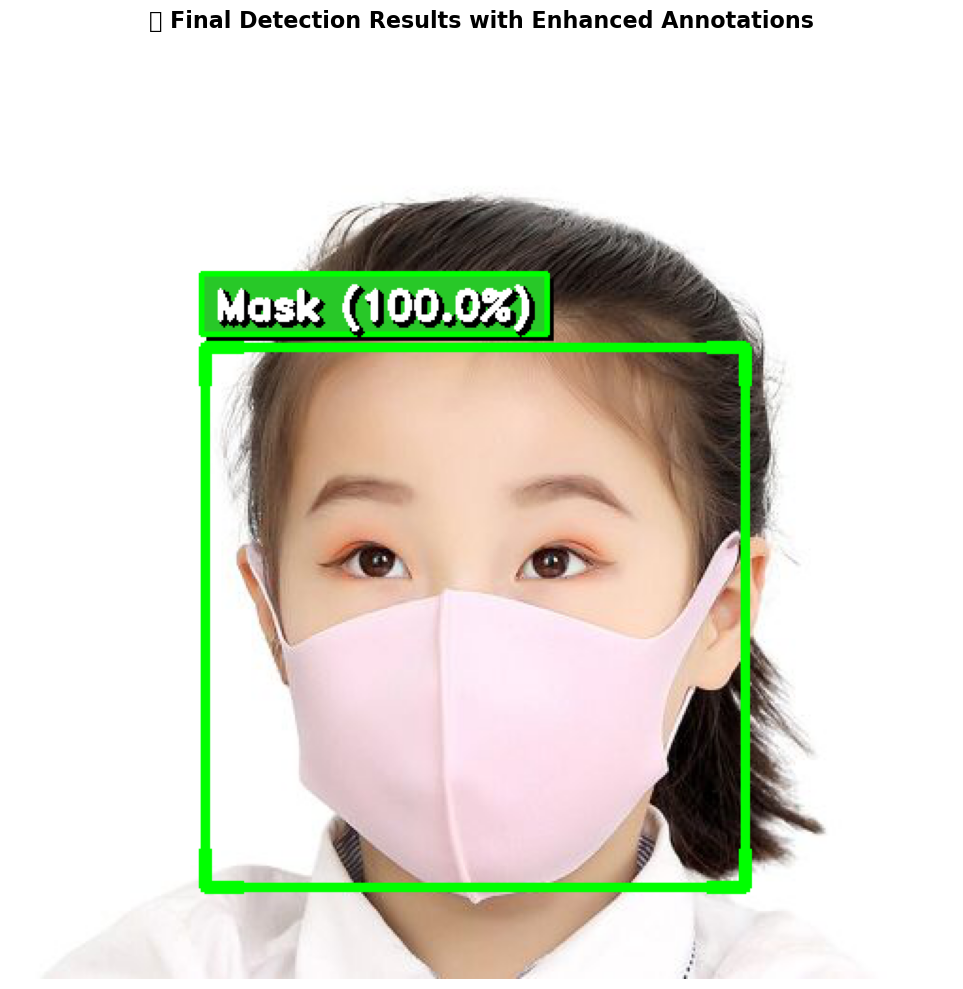

✅ Visualization complete!


In [105]:
# Display the final annotated image with all detections
if 'annotated_image' in locals():
    # Convert BGR to RGB for matplotlib display
    # annotated_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
    
    plt.figure(figsize=(14, 10))
    plt.imshow(annotated_image)
    plt.title('🎯 Final Detection Results with Enhanced Annotations', fontsize=16, fontweight='bold')
    plt.axis('off')
    plt.tight_layout()
    plt.show()
    
    print("✅ Visualization complete!")
else:
    print("❌ No annotated image available. Run detection first.")

## 📈 Step 9: Visualize Statistics with Charts

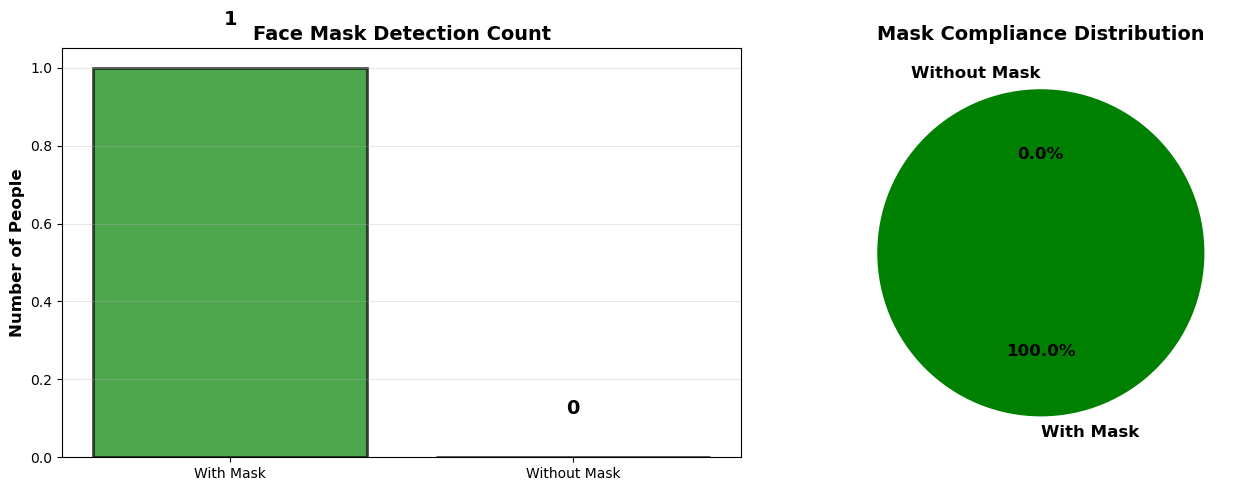

✅ Statistical charts generated!


In [106]:
# Create visualization charts
if 'stats' in locals() and stats['total_faces'] > 0:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Bar chart
    categories = ['With Mask', 'Without Mask']
    counts = [stats['mask_count'], stats['no_mask_count']]
    colors_chart = ['green', 'red']
    
    axes[0].bar(categories, counts, color=colors_chart, alpha=0.7, edgecolor='black', linewidth=2)
    axes[0].set_ylabel('Number of People', fontsize=12, fontweight='bold')
    axes[0].set_title('Face Mask Detection Count', fontsize=14, fontweight='bold')
    axes[0].grid(axis='y', alpha=0.3)
    
    # Add count labels on bars
    for i, (cat, count) in enumerate(zip(categories, counts)):
        axes[0].text(i, count + 0.1, str(count), ha='center', va='bottom', fontsize=14, fontweight='bold')
    
    # Pie chart
    if sum(counts) > 0:
        axes[1].pie(counts, labels=categories, colors=colors_chart, autopct='%1.1f%%',
                   startangle=90, textprops={'fontsize': 12, 'fontweight': 'bold'})
        axes[1].set_title('Mask Compliance Distribution', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    print("✅ Statistical charts generated!")
else:
    print("❌ No statistics available to visualize.")

## Streamlit APP!

In [ ]:
%%writefile face_mask_detection.py #this is the file name

import streamlit as st
import cv2
import numpy as np
from tensorflow.keras.models import load_model

st.title('Face Mask Detection Application')

#load h5 model
model = load_model(r"face_mask_detection_model.h5")

upload = st.file_uploader('Please, Upload an Image', type = ['png', 'jpeg', 'jpg'])

#define a function for face detection and mask detection
def detect_and_predict_mask(image):
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    faces = face_cascade.detectMultiScale(image, scaleFactor= 1.1)

    prediction = []

    for (x,y, w,h) in faces:
        face = image[y : y+h , x : x + w] #height, width
        face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
        face = cv2.resize(face, (128, 128))
        face = np.array(face) / 255.0
        face = np.expand_dims(face, axis = 0)

        #predict mask/no mask
        prediction.append(model.predict(face))
    return faces, prediction

if upload is not None:
    file_bytes = np.asarray(bytearray(upload.read()),dtype = np.uint8)
    image = cv2.imdecode(file_bytes, 1)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    faces, prediction= detect_and_predict_mask(image)

    for i, (x, y, w, h) in enumerate(faces):
        (mask, withoutMask) = prediction[i][0]
        label = 'Mask' if mask > withoutMask else 'No Mask'
        color = (0,0,255) if label == 'Mask' else (255,0,0)

        cv2.putText(image, label, (x,y), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)
        cv2.rectangle(image, (x,y), (x + w, y+h), color, 1)
        

st.image(image)

## 🎯 Try More Images!

You can now go back to Step 5 and change the `image_path` to test with different images:

```python
# Example images in Image_examples folder:
# - 1.jpg
# - 2.jpg
# - 3.png
```

Just update the path and re-run from Step 5 onwards!

---

## 🎉 Congratulations!

You've successfully:
- ✅ Loaded a pre-trained face mask detection model
- ✅ Detected faces using Haar Cascade
- ✅ Classified mask presence with CNN
- ✅ Visualized results with enhanced annotations
- ✅ Generated statistical charts

**Keep experimenting with different images!** 🚀